#  Setup and Load Data

#### 1. Install Dependencies Install required libraries

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [1]:
# Import Liabraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, f1_score

C:\Users\sumay\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### 2. Extract the zip file and loading the dataset

In [2]:
import zipfile

with zipfile.ZipFile('archive.zip', 'r') as z:
    z.extractall('brazilian_ecommerce')

In [3]:
# Loading the Dataset
customers = pd.read_csv('brazilian_ecommerce/olist_customers_dataset.csv')
geolocation = pd.read_csv('brazilian_ecommerce/olist_geolocation_dataset.csv')
order_items = pd.read_csv('brazilian_ecommerce/olist_order_items_dataset.csv')
order_payments = pd.read_csv('brazilian_ecommerce/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('brazilian_ecommerce/olist_order_reviews_dataset.csv')
orders = pd.read_csv('brazilian_ecommerce/olist_orders_dataset.csv')
products = pd.read_csv('brazilian_ecommerce/olist_products_dataset.csv')
sellers = pd.read_csv('brazilian_ecommerce/olist_sellers_dataset.csv')
category_translation = pd.read_csv('brazilian_ecommerce/product_category_name_translation.csv')


In [5]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [7]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [13]:
category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [14]:
print("The shape of Customer is", customers.shape)
print("The shape of geolocation is", geolocation.shape )
print("The shape of order_items is", order_items.shape)
print("The shape of order_payments is", order_payments.shape)
print("The shape of order_reviews is", order_reviews.shape)
print("The shape of orders is", orders.shape)
print("The shape of products is", products.shape)
print("The shape of sellers is", sellers.shape)
print("The shape of category_translation is", category_translation.shape)

The shape of Customer is (99441, 5)
The shape of geolocation is (1000163, 5)
The shape of order_items is (112650, 7)
The shape of order_payments is (103886, 5)
The shape of order_reviews is (99224, 7)
The shape of orders is (99441, 8)
The shape of products is (32951, 9)
The shape of sellers is (3095, 4)
The shape of category_translation is (71, 2)


Observation:

  Here we are getting number of data that are present in the every dataset

#### 3 Display dataset information

In [17]:
# Here we try see all dataset info at a time

datasets = [customers, geolocation, order_items, order_payments, order_reviews, orders, products, sellers, category_translation]
for i, df in enumerate(datasets):
    print(f"Dataset {i+1}:")
    display(df.head())
    print(df.info())

Dataset 1:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
Dataset 2:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None
Dataset 3:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
Dataset 4:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
Dataset 5:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None
Dataset 6:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
Dataset 7:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
Dataset 8:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
Dataset 9:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


# Data Cleaning

#### 4. Checking the Missing Values

In [18]:

for df in datasets:
    print(df.isnull().sum())


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
order_id                            0
customer_id                         0
order_st

Observation:
    
1. Here order_delivered_customer_date has null value but it is a 
   categegorical data so we will drop it.
2. Rest are the numerical data so we can use statical model but here we will 
   use fillna.

#### 5. Handle Missing Values Replace missing values or drop rows where appropriate

In [19]:
orders.dropna(subset=['order_delivered_customer_date'], inplace=True)
order_reviews['review_comment_title'].fillna('No Title', inplace=True)
order_reviews['review_comment_message'].fillna('No Message', inplace=True)

C:\Users\sumay\AppData\Local\Temp\ipykernel_8524\3120104205.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews['review_comment_title'].fillna('No Title', inplace=True)
C:\Users\sumay\AppData\Local\Temp\ipykernel_8524\3120104205.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

#### 6. Remove Duplicates

In [20]:
for df in datasets:
    df.drop_duplicates(inplace=True)


In [21]:
df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [22]:
df.shape

(71, 2)

#### 7. Normalize Column Names

In [23]:
for df in datasets:
    df.columns = df.columns.str.lower().str.replace(' ', '_')


Why Normalize Column Names?
1. Consistency: Makes the column names consistent across datasets, avoiding confusion when merging or manipulating data.
2. Ease of Access: Simplifies referencing column names in code (e.g., avoids issues with spaces or special characters).
3. Best Practices: Aligns with good coding practices for clean and readable scripts.



# Merge Datasets

#### 8 Merge customers and orders datasets

In [24]:
customer_orders = pd.merge(customers, orders, on='customer_id')

In [25]:
customer_orders.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00


Why i did so:
    
1. Combines customer information with their orders to create a cohesive dataset.

#### 9 Add product category translations

In [26]:
# Merge Products with Category Translation

products = pd.merge(products, category_translation, on='product_category_name', how='left')

In [27]:
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art


Why i did so:
    
    1. Translates product categories from Portuguese to English for better understanding.


#### 10. Merge all relevant datasets

In [28]:
# Combine Orders, Items, Payments, and Reviews

full_data = customer_orders \
    .merge(order_items, on='order_id') \
    .merge(order_payments, on='order_id') \
    .merge(order_reviews, on='order_id', how='left') \
    .merge(products, on='product_id') \
    .merge(sellers, on='seller_id', how='left')


Observations:

    1. Saves the cleaned dataset for future analysis and displays a preview.    

#### 11. Saving the Clean dataset and exporting it to the CSV formate 

In [29]:
full_data.to_csv('cleaned_data.csv', index=False)
full_data.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,88303,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture,8577,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture,8577,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort,14940,ibitinga,SP


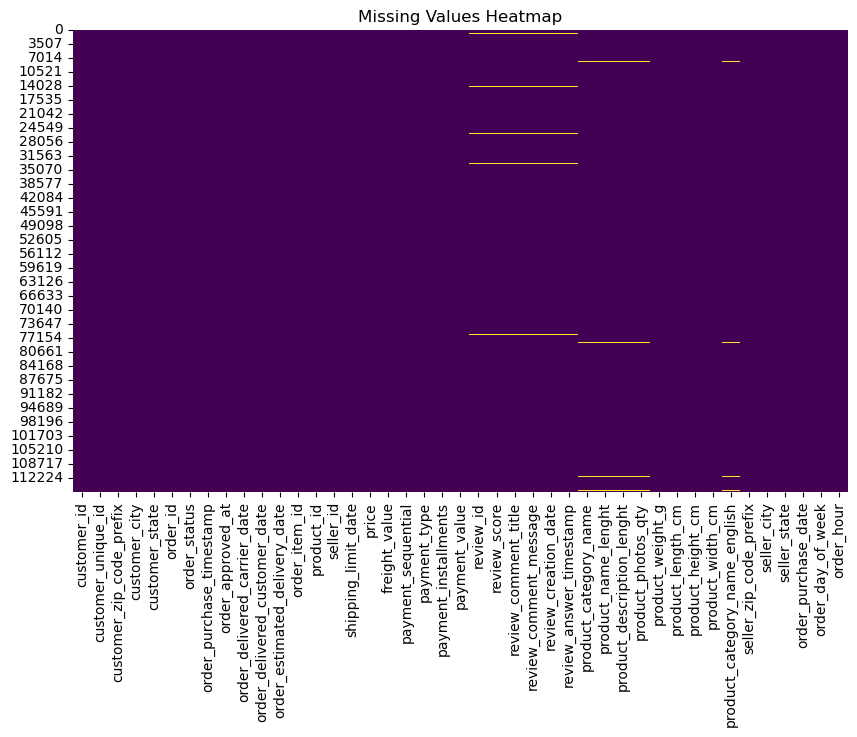

In [35]:
# Missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(full_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


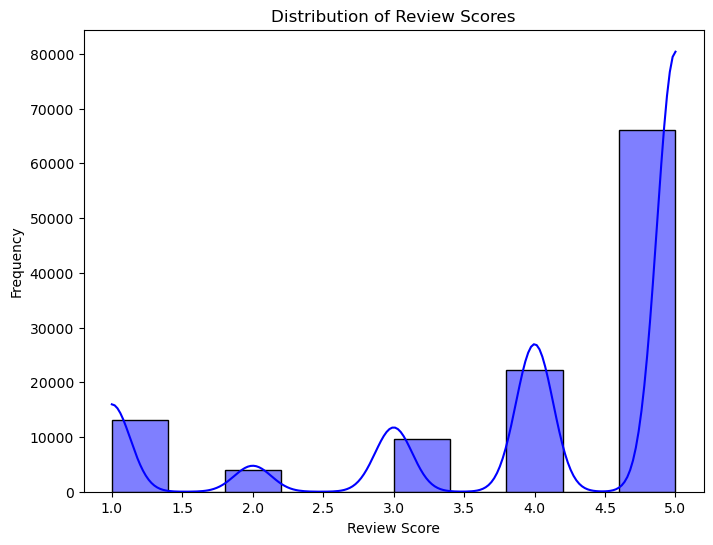

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(full_data['review_score'], kde=True, bins=10, color='blue')
plt.title("Distribution of Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

# Feature Engineering

#### 12. Create Temporal Features

In [30]:
full_data['order_purchase_date'] = pd.to_datetime(full_data['order_purchase_timestamp']).dt.date
full_data['order_day_of_week'] = pd.to_datetime(full_data['order_purchase_timestamp']).dt.day_name()
full_data['order_hour'] = pd.to_datetime(full_data['order_purchase_timestamp']).dt.hour

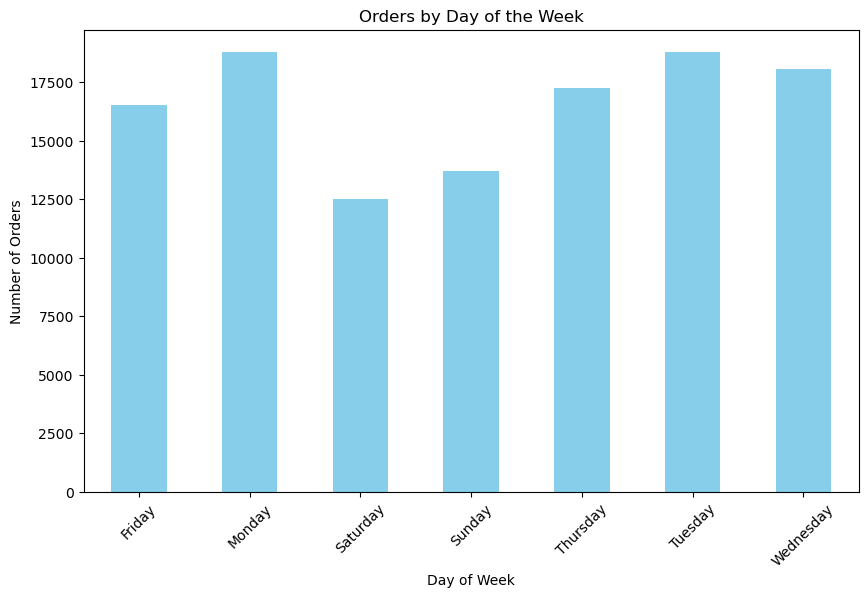

In [39]:
orders_by_day = full_data.groupby('order_day_of_week').size()

plt.figure(figsize=(10, 6))
orders_by_day.plot(kind='bar', color='skyblue')
plt.title("Orders by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


Observation:
    
    1. Extracts valuable time-related features like the day of the week and hour of purchase.

In [31]:
full_data.head(4)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,order_purchase_date,order_day_of_week,order_hour
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP,2017-05-16,Tuesday,15
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,89.0,15.0,40.0,housewares,88303,itajai,SC,2018-01-12,Friday,20
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,52.0,52.0,17.0,office_furniture,8577,itaquaquecetuba,SP,2018-05-19,Saturday,16
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,56.0,51.0,28.0,office_furniture,8577,itaquaquecetuba,SP,2018-03-13,Tuesday,16


In [32]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115719 entries, 0 to 115718
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115719 non-null  object 
 1   customer_unique_id             115719 non-null  object 
 2   customer_zip_code_prefix       115719 non-null  int64  
 3   customer_city                  115719 non-null  object 
 4   customer_state                 115719 non-null  object 
 5   order_id                       115719 non-null  object 
 6   order_status                   115719 non-null  object 
 7   order_purchase_timestamp       115719 non-null  object 
 8   order_approved_at              115704 non-null  object 
 9   order_delivered_carrier_date   115718 non-null  object 
 10  order_delivered_customer_date  115719 non-null  object 
 11  order_estimated_delivery_date  115719 non-null  object 
 12  order_item_id                 

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


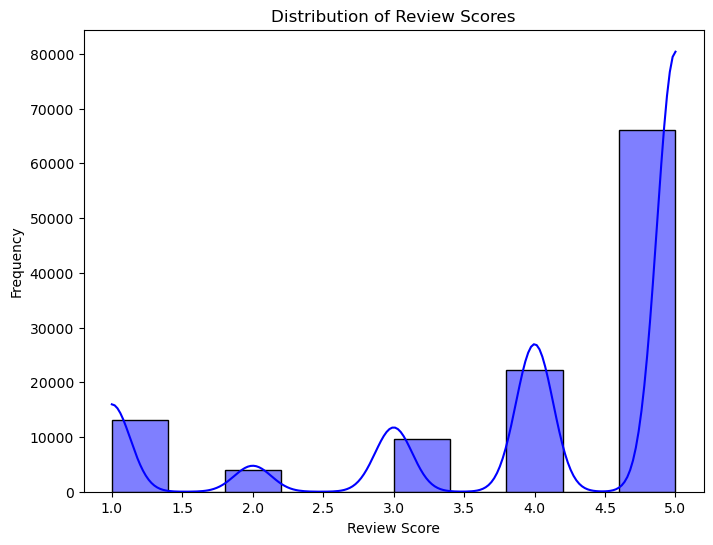

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(full_data['review_score'], kde=True, bins=10, color='blue')
plt.title("Distribution of Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

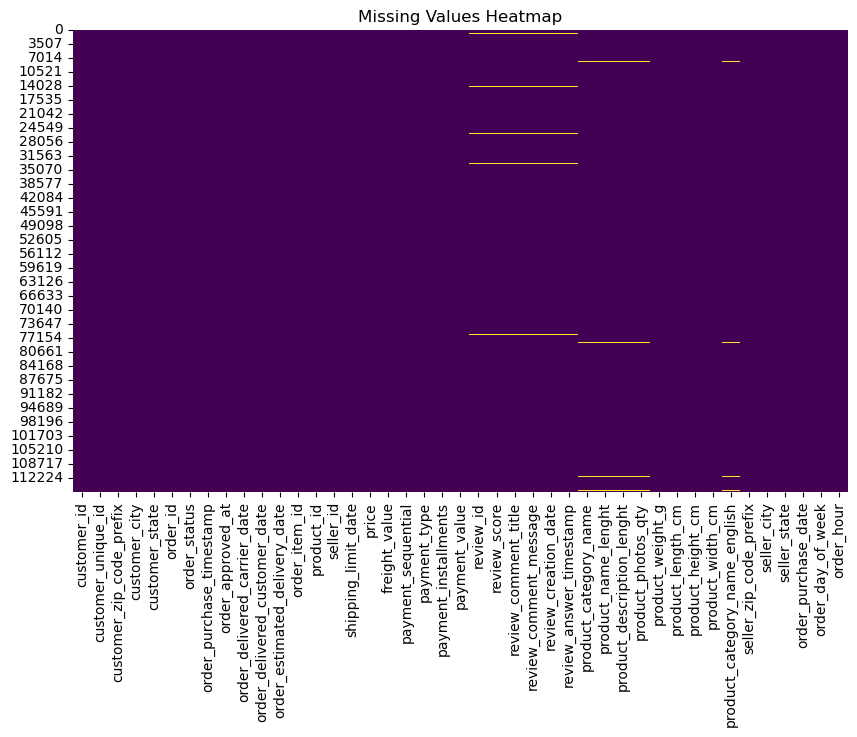

In [34]:
# Missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(full_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

#### 13. Create Interaction Features

In [37]:
full_data['price_per_item'] = full_data['price'] / full_data['order_item_id']
full_data['total_cost'] = full_data['price'] + full_data['freight_value']


Observation:
    
    1 Calculates new features like price per item and total cost to add more predictive power.

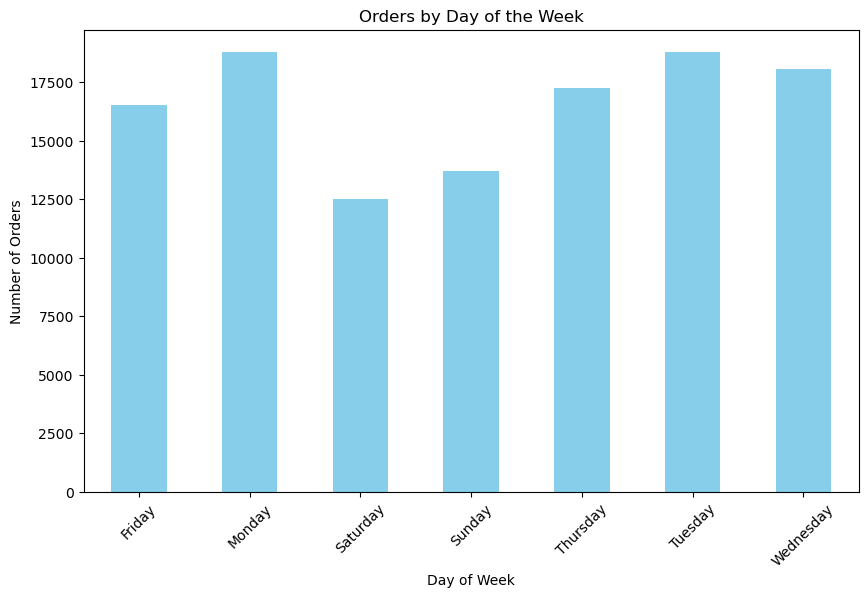

In [38]:
orders_by_day = full_data.groupby('order_day_of_week').size()

plt.figure(figsize=(10, 6))
orders_by_day.plot(kind='bar', color='skyblue')
plt.title("Orders by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


#### 14 Encode categorical variables

In [40]:
le = LabelEncoder()
full_data['customer_state_encoded'] = le.fit_transform(full_data['customer_state'])

Observations:
    
    1. Transforms categorical columns into numerical format for model compatibility.

In [41]:
full_data.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,order_purchase_date,order_day_of_week,order_hour,price_per_item,total_cost,customer_state_encoded
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,office_furniture,8577,itaquaquecetuba,SP,2017-05-16,Tuesday,15,124.99,146.87,25
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,housewares,88303,itajai,SC,2018-01-12,Friday,20,289.00,335.48,25
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,office_furniture,8577,itaquaquecetuba,SP,2018-05-19,Saturday,16,139.94,157.73,25


In [43]:
full_data.shape

(115719, 46)

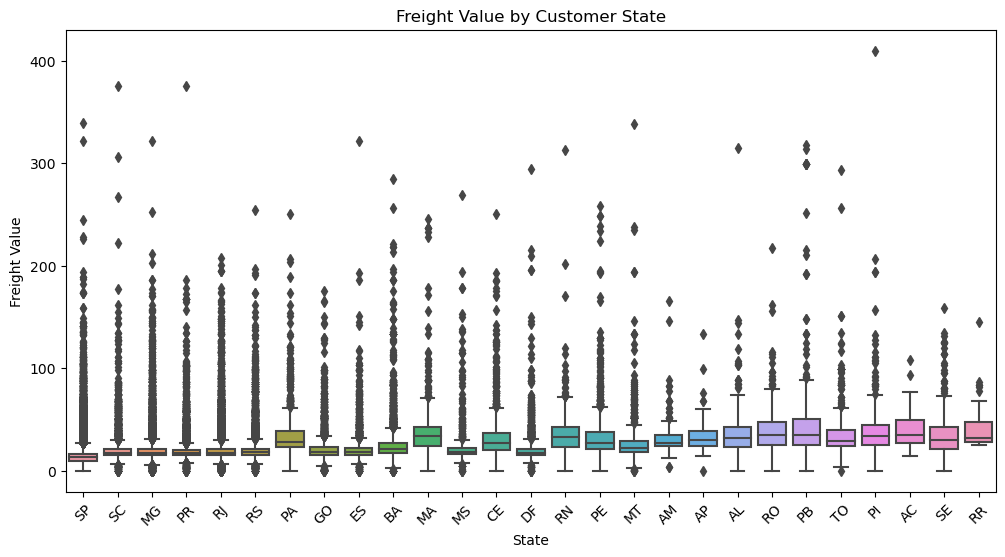

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=full_data, x='customer_state', y='freight_value')
plt.title("Freight Value by Customer State")
plt.xlabel("State")
plt.ylabel("Freight Value")
plt.xticks(rotation=45)
plt.show()


#### 15. Scale Numerical Features

In [45]:
scaler = StandardScaler()
numerical_cols = ['price', 'freight_value', 'product_weight_g']
full_data[numerical_cols] = scaler.fit_transform(full_data[numerical_cols])


Observations:
    
    1. Reduces high-dimensional features into two principal components for simplification.

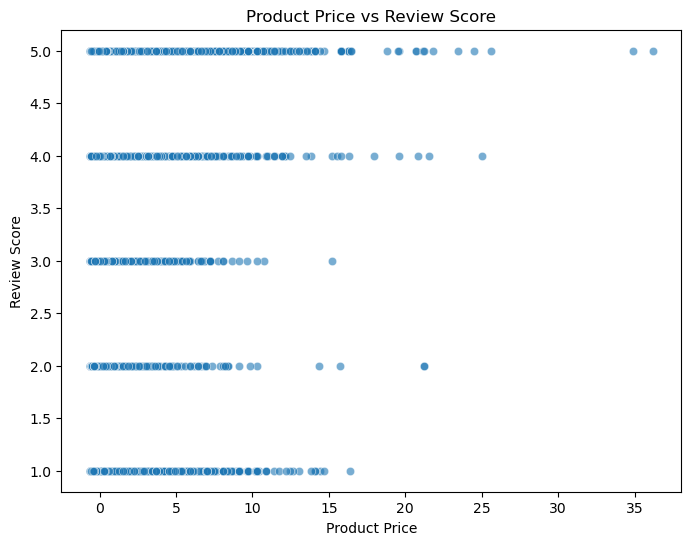

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=full_data, x='price', y='review_score', alpha=0.6)
plt.title("Product Price vs Review Score")
plt.xlabel("Product Price")
plt.ylabel("Review Score")
plt.show()


#### 16. Perform PCA for Feature Reduction

In [49]:
pca = PCA(n_components=2)
full_data[['pca1', 'pca2']] = pca.fit_transform(full_data[numerical_cols])

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [52]:
full_data.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date        1
order_delivered_customer_date       0
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_id                         861
review_score                      861
review_comment_title              861
review_comment_message            861
review_creat

Observation:
    
    
    1. There are some more null value here in the full_data so for that we are not we will not able to performe PCA

In [60]:
# Drop all rows with any null values
full_data = full_data.dropna()

# Display the number of rows and columns after dropping
print(f"Original dataset shape: {full_data.shape}")



Original dataset shape: (113193, 46)


In [58]:
full_data.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
product_category_nam

In [61]:
pca = PCA(n_components=2)
full_data[['pca1', 'pca2']] = pca.fit_transform(full_data[numerical_cols])

observaation:
    
    1. Reduces high-dimensional features into two principal components for simplification.

In [91]:
pd.set_option('display.max_columns', None)

In [92]:
## Now Exporting the full clean dataset for the future uses

full_data.to_csv('cleaned_dataset_without_null.csv', index=False)
full_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,order_purchase_date,order_day_of_week,order_hour,price_per_item,total_cost,customer_state_encoded,pca1,pca2
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,0.027816,0.120765,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Message,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,1.743465,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP,2017-05-16,Tuesday,15,124.99,146.87,25,1.137827,-0.787592
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,0.925655,1.685815,1,credit_card,8,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Message,2018-01-30 00:00:00,2018-02-10 22:43:29,utilidades_domesticas,43.0,1002.0,3.0,2.132323,89.0,15.0,40.0,housewares,88303,itajai,SC,2018-01-12,Friday,20,289.00,335.48,25,2.796962,-0.580042
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,0.109656,-0.139441,1,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Message,2018-06-15 00:00:00,2018-06-15 12:10:59,moveis_escritorio,55.0,955.0,1.0,1.633196,52.0,52.0,17.0,office_furniture,8577,itaquaquecetuba,SP,2018-05-19,Saturday,16,139.94,157.73,25,0.949087,-0.603221
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,0.164399,0.214922,1,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Message,2018-03-29 00:00:00,2018-04-02 18:36:47,moveis_escritorio,48.0,1066.0,1.0,2.665115,56.0,51.0,28.0,office_furniture,8577,itaquaquecetuba,SP,2018-03-13,Tuesday,16,149.94,173.30,25,1.819116,-1.107202
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,0.602672,0.144304,1,credit_card,8,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,casa_conforto,61.0,407.0,1.0,0.820226,45.0,15.0,35.0,home_confort,14940,ibitinga,SP,2018-07-29,Sunday,9,230.00,252.25,25,0.881933,0.114264


In [65]:
full_data.shape

(113193, 48)

In [75]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113193 entries, 0 to 115718
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113193 non-null  object 
 1   customer_unique_id             113193 non-null  object 
 2   customer_zip_code_prefix       113193 non-null  int64  
 3   customer_city                  113193 non-null  object 
 4   customer_state                 113193 non-null  object 
 5   order_id                       113193 non-null  object 
 6   order_status                   113193 non-null  object 
 7   order_purchase_timestamp       113193 non-null  object 
 8   order_approved_at              113193 non-null  object 
 9   order_delivered_carrier_date   113193 non-null  object 
 10  order_delivered_customer_date  113193 non-null  object 
 11  order_estimated_delivery_date  113193 non-null  object 
 12  order_item_id                  1131

In [90]:
full_data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'order_purchase_date',
       'order_day_of_we

In [93]:
full_data.to_csv('cleaned_dataset_without_null.csv', index=False)
full_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,order_purchase_date,order_day_of_week,order_hour,price_per_item,total_cost,customer_state_encoded,pca1,pca2
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,0.027816,0.120765,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Message,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,1.743465,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP,2017-05-16,Tuesday,15,124.99,146.87,25,1.137827,-0.787592
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,0.925655,1.685815,1,credit_card,8,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Message,2018-01-30 00:00:00,2018-02-10 22:43:29,utilidades_domesticas,43.0,1002.0,3.0,2.132323,89.0,15.0,40.0,housewares,88303,itajai,SC,2018-01-12,Friday,20,289.00,335.48,25,2.796962,-0.580042
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,0.109656,-0.139441,1,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Message,2018-06-15 00:00:00,2018-06-15 12:10:59,moveis_escritorio,55.0,955.0,1.0,1.633196,52.0,52.0,17.0,office_furniture,8577,itaquaquecetuba,SP,2018-05-19,Saturday,16,139.94,157.73,25,0.949087,-0.603221
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,0.164399,0.214922,1,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Message,2018-03-29 00:00:00,2018-04-02 18:36:47,moveis_escritorio,48.0,1066.0,1.0,2.665115,56.0,51.0,28.0,office_furniture,8577,itaquaquecetuba,SP,2018-03-13,Tuesday,16,149.94,173.30,25,1.819116,-1.107202
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,0.602672,0.144304,1,credit_card,8,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,casa_conforto,61.0,407.0,1.0,0.820226,45.0,15.0,35.0,home_confort,14940,ibitinga,SP,2018-07-29,Sunday,9,230.00,252.25,25,0.881933,0.114264


Removing:
  
    1. Here we are removing the unnecessary columns which are not required.
    2. Might which cause Overfitting.
    3. And mainly Categorical Variable

In [119]:
num_new_data=full_data.drop(columns=[ 
    "customer_id","customer_unique_id","customer_zip_code_prefix","customer_city","customer_state",
    "order_id","order_purchase_timestamp","order_approved_at","order_delivered_carrier_date",
    "order_estimated_delivery_date", "order_item_id","product_id", "seller_id", "shipping_limit_date", "payment_type", 
    "review_id", "review_comment_title", "review_comment_message", "review_creation_date", "review_answer_timestamp",
    "product_category_name", "product_category_name_english", "seller_city", "seller_state", "order_day_of_week",
    "order_status","order_delivered_customer_date","order_purchase_date"
])

In [120]:
num_new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113193 entries, 0 to 115718
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   price                       113193 non-null  float64
 1   freight_value               113193 non-null  float64
 2   payment_sequential          113193 non-null  int64  
 3   payment_installments        113193 non-null  int64  
 4   payment_value               113193 non-null  float64
 5   review_score                113193 non-null  float64
 6   product_name_lenght         113193 non-null  float64
 7   product_description_lenght  113193 non-null  float64
 8   product_photos_qty          113193 non-null  float64
 9   product_weight_g            113193 non-null  float64
 10  product_length_cm           113193 non-null  float64
 11  product_height_cm           113193 non-null  float64
 12  product_width_cm            113193 non-null  float64
 13  seller_zip_code_pre

In [121]:
num_new_data.head()

,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,order_hour,price_per_item,total_cost,customer_state_encoded,pca1,pca2
0,0.027816,0.120765,1,2,146.87,4.0,41.0,1141.0,1.0,1.743465,54.0,64.0,31.0,8577,15,124.99,146.87,25,1.137827,-0.787592
1,0.925655,1.685815,1,8,335.48,5.0,43.0,1002.0,3.0,2.132323,89.0,15.0,40.0,88303,20,289.00,335.48,25,2.796962,-0.580042
2,0.109656,-0.139441,1,7,157.73,5.0,55.0,955.0,1.0,1.633196,52.0,52.0,17.0,8577,16,139.94,157.73,25,0.949087,-0.603221
3,0.164399,0.214922,1,1,173.30,5.0,48.0,1066.0,1.0,2.665115,56.0,51.0,28.0,8577,16,149.94,173.30,25,1.819116,-1.107202
4,0.602672,0.144304,1,8,252.25,5.0,61.0,407.0,1.0,0.820226,45.0,15.0,35.0,14940,9,230.00,252.25,25,0.881933,0.114264


In [141]:
full_data.to_csv('Last_dataset_without_categoricalVariable.csv', index=False)
full_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,order_purchase_date,order_day_of_week,order_hour,price_per_item,total_cost,customer_state_encoded,pca1,pca2
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,0.027816,0.120765,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Message,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,1.743465,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP,2017-05-16,Tuesday,15,124.99,146.87,25,1.137827,-0.787592
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,0.925655,1.685815,1,credit_card,8,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Message,2018-01-30 00:00:00,2018-02-10 22:43:29,utilidades_domesticas,43.0,1002.0,3.0,2.132323,89.0,15.0,40.0,housewares,88303,itajai,SC,2018-01-12,Friday,20,289.00,335.48,25,2.796962,-0.580042
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,0.109656,-0.139441,1,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Message,2018-06-15 00:00:00,2018-06-15 12:10:59,moveis_escritorio,55.0,955.0,1.0,1.633196,52.0,52.0,17.0,office_furniture,8577,itaquaquecetuba,SP,2018-05-19,Saturday,16,139.94,157.73,25,0.949087,-0.603221
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,0.164399,0.214922,1,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Message,2018-03-29 00:00:00,2018-04-02 18:36:47,moveis_escritorio,48.0,1066.0,1.0,2.665115,56.0,51.0,28.0,office_furniture,8577,itaquaquecetuba,SP,2018-03-13,Tuesday,16,149.94,173.30,25,1.819116,-1.107202
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,0.602672,0.144304,1,credit_card,8,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,casa_conforto,61.0,407.0,1.0,0.820226,45.0,15.0,35.0,home_confort,14940,ibitinga,SP,2018-07-29,Sunday,9,230.00,252.25,25,0.881933,0.114264


# Model Building and Evaluation

#### 17. Spliting the data

In [122]:
target = 'review_score'
features = [col for col in num_new_data.columns if col != target]

X = num_new_data[features]
y = num_new_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [125]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [127]:
lr.score(X_train,y_train)

0.02174821771967672

In [131]:
lr.score(X_test,y_test)

0.019525359637661888

Note:

    This is really not good model as the Accuracy is very very less or we can say that the accurary is only 21%

In [128]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.7645011081333064


In [129]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {-scores.mean()}")


Cross-Validation MSE: 1.776914173223263


In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [138]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [133]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [136]:
# Predict the target on the test set
y_pred = clf.predict(X_test)

# Evaluate the model performance
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.48089579928442067


Note:
    
    1. Accuracy is not good because i didn't do the Feature Eng., Feature Scaling, EDA good

In [140]:
import joblib

# Save the trained model to a file
joblib.dump(clf, 'decision_tree_model.pkl')

# Load the model back (if needed)
clf_loaded = joblib.load('decision_tree_model.pkl')
